In [1]:
from scipy.io import wavfile

(source_fs, source_data) = wavfile.read('./data/2nd_experiment/source.wav')

(target_fs, target_ll_data) = wavfile.read('./data/2nd_experiment/ll.wav')
(target_fs, target_ml_data) = wavfile.read('./data/2nd_experiment/ml.wav')
(target_fs, target_hl_data) = wavfile.read('./data/2nd_experiment/hl.wav')

(target_fs, target_lm_data) = wavfile.read('./data/2nd_experiment/lm.wav')
(target_fs, target_mm_data) = wavfile.read('./data/2nd_experiment/mm.wav')
(target_fs, target_hm_data) = wavfile.read('./data/2nd_experiment/hm.wav')

(target_fs, target_ll_lm_data) = wavfile.read('./data/2nd_experiment/ll_lm.wav')
(target_fs, target_hl_hm_data) = wavfile.read('./data/2nd_experiment/hl_hm.wav')

In [2]:
import pandas as pd

In [3]:
source_df = pd.DataFrame(source_data, columns=['L', 'R'])['L']

target_ll_df = pd.DataFrame(target_ll_data, columns=['L', 'R'])['L']
target_ml_df = pd.DataFrame(target_ml_data, columns=['L', 'R'])['L']
target_hl_df = pd.DataFrame(target_hl_data, columns=['L', 'R'])['L']

target_lm_df = pd.DataFrame(target_lm_data, columns=['L', 'R'])['L']
target_mm_df = pd.DataFrame(target_mm_data, columns=['L', 'R'])['L']
target_hm_df = pd.DataFrame(target_hm_data, columns=['L', 'R'])['L']

target_ll_lm_df = pd.DataFrame(target_ll_lm_data, columns=['L', 'R'])['L']
target_hl_hm_df = pd.DataFrame(target_hl_hm_data, columns=['L', 'R'])['L']

(
    source_df.max(),
    target_ll_df.max(), target_ml_df.max(), target_hl_df.max(),
    target_lm_df.max(), target_mm_df.max(), target_hm_df.max(),
    target_ll_lm_df.max(), target_hl_hm_df.max(),
)

(28421, 24199, 23898, 24171, 23374, 23954, 24364, 21997, 24348)

In [4]:
MAX_VALUE = 2 ** 15 - 1
MAX_VALUE

32767

In [5]:
(
    len(source_df),
    len(target_ll_df), len(target_ml_df), len(target_hl_df),
    len(target_lm_df), len(target_mm_df), len(target_hm_df),
    len(target_ll_lm_df), len(target_hl_hm_df),
)

(1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016,
 1669016)

## Data processing

In [6]:
# N_TRAIN = 44000
# N_TEST = 44000
N_TRAIN = 166000
N_TEST = 166000
N_TRAIN, N_TEST

(166000, 166000)

In [7]:
import numpy as np

In [8]:
# Adding knobs features

X_train_raw_ll = pd.Series(list(map(lambda x: [x,  0.0, 5.0], source_df[:N_TRAIN])))
X_train_raw_ml = pd.Series(list(map(lambda x: [x,  3.0, 5.0], source_df[:N_TRAIN])))
X_train_raw_hl = pd.Series(list(map(lambda x: [x, 10.0, 5.0], source_df[:N_TRAIN])))

X_train_raw_lm = pd.Series(list(map(lambda x: [x, 5.0,  0.0], source_df[:N_TRAIN])))
X_train_raw_mm = pd.Series(list(map(lambda x: [x, 5.0,  3.0], source_df[:N_TRAIN])))
X_train_raw_hm = pd.Series(list(map(lambda x: [x, 5.0, 10.0], source_df[:N_TRAIN])))

(
    len(X_train_raw_ll), len(X_train_raw_ml), len(X_train_raw_hl),
    len(X_train_raw_lm), len(X_train_raw_mm), len(X_train_raw_hm),
)

(166000, 166000, 166000, 166000, 166000, 166000)

In [82]:
X_test_raw_ll_lm = pd.Series(list(map(lambda x: [x, 5.0,  5.0], source_df[:N_TEST])))
X_test_raw_hl_hm = pd.Series(list(map(lambda x: [x, 5.0, 5.0], source_df[:N_TEST])))

len(X_test_raw_ll_lm), len(X_test_raw_hl_hm)

(166000, 166000)

In [83]:
# y_train_raw = np.concatenate([
#     target_lg_df['L'][:TR_END_LOC],
#     target_mg_df['L'][:TR_END_LOC],
#     target_hg_df['L'][:TR_END_LOC]
# ])

y_train_raw_ll = pd.Series(target_ll_df[:N_TRAIN])
y_train_raw_ml = pd.Series(target_ml_df[:N_TRAIN])
y_train_raw_hl = pd.Series(target_hl_df[:N_TRAIN])

y_train_raw_lm = pd.Series(target_lm_df[:N_TRAIN])
y_train_raw_mm = pd.Series(target_mm_df[:N_TRAIN])
y_train_raw_hm = pd.Series(target_hm_df[:N_TRAIN])

(
    len(y_train_raw_ll), len(y_train_raw_ml), len(y_train_raw_hl),
    len(y_train_raw_lm), len(y_train_raw_mm), len(y_train_raw_hm),
)

(166000, 166000, 166000, 166000, 166000, 166000)

In [84]:
y_test_raw_ll_lm = pd.Series(target_ll_lm_df[:N_TEST])
y_test_raw_hl_hm = pd.Series(target_hl_hm_df[:N_TEST])

len(y_test_raw_ll_lm), len(y_test_raw_hl_hm)

(166000, 166000)

In [85]:
import IPython.display as ipd
ipd.Audio(y_test_raw_hl_hm, rate=44000)

In [86]:
n_features = 3
N_WINDOW_POINTS = 64

In [87]:
def normalize(arr, forced_abs=None, mean=None):
    left_abs = np.abs(arr.mean() - arr.min())
    right_abs = np.abs(arr.max() - arr.mean())
    
    n = max(left_abs, right_abs)
    
    if (forced_abs is not None):
        n = forced_abs
        
    if (mean is None):
        mean = arr.mean()
    
    
    return np.clip((arr - mean) / n, -1.0, 1.0)

In [88]:
def make_windows(X, y, n_window_points):
    index = 0
    
    res_X = []
    res_y = []
    
    for index in range(0, min(len(X), len(y)) - n_window_points - 1):
        res_X.append(X[index:(index + n_window_points)])
#         res_y.append(y.iloc[index + n_window_points])
        res_y.append(y[index + n_window_points - 1])

    return (np.array(res_X), np.array(res_y))

In [89]:
def norm_make_windows_and_reshape(X, y, n_samples, n_window_points):
    X_n = np.array(list(map(lambda x: np.array([x[0] / MAX_VALUE] + x[1:]), X)))
    X_n = X_n.astype('float32')
    
    y_s = np.array(list(map(lambda x: np.array(x), y)))
    y_n = normalize(y_s, forced_abs=MAX_VALUE, mean=0.0)
    y_n = y_n.astype('float32')
    
    (X_f, y_f) = make_windows(
        X_n[:(n_samples + n_window_points + 1)],
        y_n[:(n_samples + n_window_points + 1)],
        n_window_points
    )
    
    return (X_f, y_f)

In [90]:
(X_tr_ll_f, y_tr_ll_f) = norm_make_windows_and_reshape(X_train_raw_ll, y_train_raw_ll, N_TRAIN, N_WINDOW_POINTS)
(X_tr_ml_f, y_tr_ml_f) = norm_make_windows_and_reshape(X_train_raw_ml, y_train_raw_ml, N_TRAIN, N_WINDOW_POINTS)
(X_tr_hl_f, y_tr_hl_f) = norm_make_windows_and_reshape(X_train_raw_hl, y_train_raw_hl, N_TRAIN, N_WINDOW_POINTS)

(X_tr_lm_f, y_tr_lm_f) = norm_make_windows_and_reshape(X_train_raw_lm, y_train_raw_lm, N_TRAIN, N_WINDOW_POINTS)
(X_tr_mm_f, y_tr_mm_f) = norm_make_windows_and_reshape(X_train_raw_mm, y_train_raw_mm, N_TRAIN, N_WINDOW_POINTS)
(X_tr_hm_f, y_tr_hm_f) = norm_make_windows_and_reshape(X_train_raw_hm, y_train_raw_hm, N_TRAIN, N_WINDOW_POINTS)

print(len(X_tr_ll_f), len(X_tr_ml_f), len(X_tr_hl_f))
print(len(y_tr_ll_f), len(y_tr_ml_f), len(y_tr_hl_f))

print(len(X_tr_lm_f), len(X_tr_mm_f), len(X_tr_hm_f))
print(len(y_tr_lm_f), len(y_tr_mm_f), len(y_tr_hm_f))


165935 165935 165935
165935 165935 165935
165935 165935 165935
165935 165935 165935


In [91]:
(X_te_ll_lm_f, y_te_ll_lm_f) = norm_make_windows_and_reshape(X_test_raw_ll_lm, y_test_raw_ll_lm, N_TEST, N_WINDOW_POINTS)
(X_te_hl_hm_f, y_te_hl_hm_f) = norm_make_windows_and_reshape(X_test_raw_hl_hm, y_test_raw_hl_hm, N_TEST, N_WINDOW_POINTS)

print(len(X_te_ll_lm_f), len(y_te_ll_lm_f))
print(len(X_te_hl_hm_f), len(y_te_hl_hm_f))

165935 165935
165935 165935


In [92]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Train Low knob data')

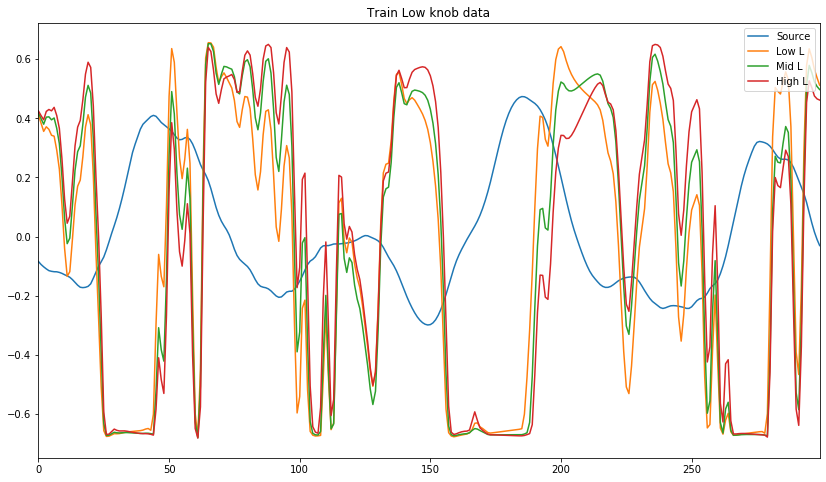

In [93]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_ll_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_tr_ll_f[start:n]).plot.line(ax=ax, label='Low L')
pd.Series(y_tr_ml_f[start:n]).plot.line(ax=ax, label='Mid L')
pd.Series(y_tr_hl_f[start:n]).plot.line(ax=ax, label='High L')
ax.legend(loc='upper right')
ax.set_title('Train Low knob data')

In [94]:
from sklearn.metrics import mean_absolute_error as mae

print('mae(l, h)', mae(y_tr_ll_f, y_tr_hl_f))
print('mae(l, m)', mae(y_tr_ll_f, y_tr_ml_f))
print('mae(m, h)', mae(y_tr_ml_f, y_tr_hl_f))

mae(l, h) 0.14075087
mae(l, m) 0.083242364
mae(m, h) 0.06754249


Text(0.5, 1.0, 'Train Mid knob data')

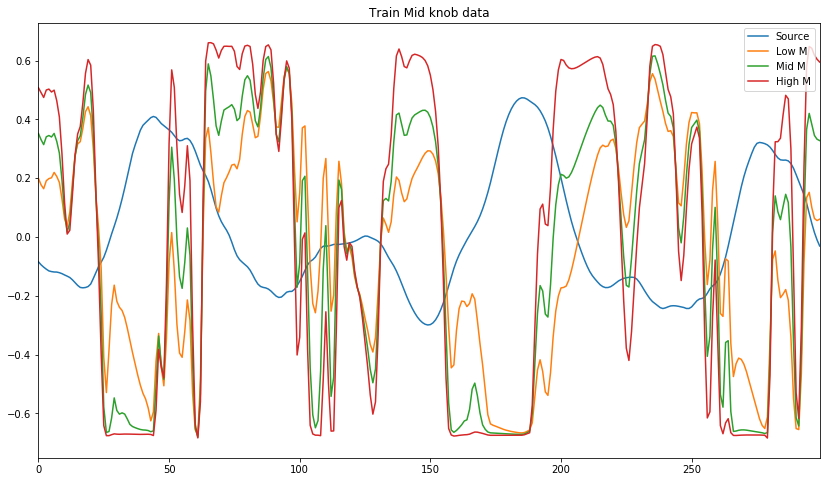

In [95]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_lm_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_tr_lm_f[start:n]).plot.line(ax=ax, label='Low M')
pd.Series(y_tr_mm_f[start:n]).plot.line(ax=ax, label='Mid M')
pd.Series(y_tr_hm_f[start:n]).plot.line(ax=ax, label='High M')
ax.legend(loc='upper right')
ax.set_title('Train Mid knob data')

In [96]:
from sklearn.metrics import mean_absolute_error as mae

print('mae(l, h)', mae(y_tr_lm_f, y_tr_hm_f))
print('mae(l, m)', mae(y_tr_lm_f, y_tr_mm_f))
print('mae(m, h)', mae(y_tr_mm_f, y_tr_hm_f))

mae(l, h) 0.21783848
mae(l, m) 0.10766556
mae(m, h) 0.11040928


Text(0.5, 1.0, 'Test data')

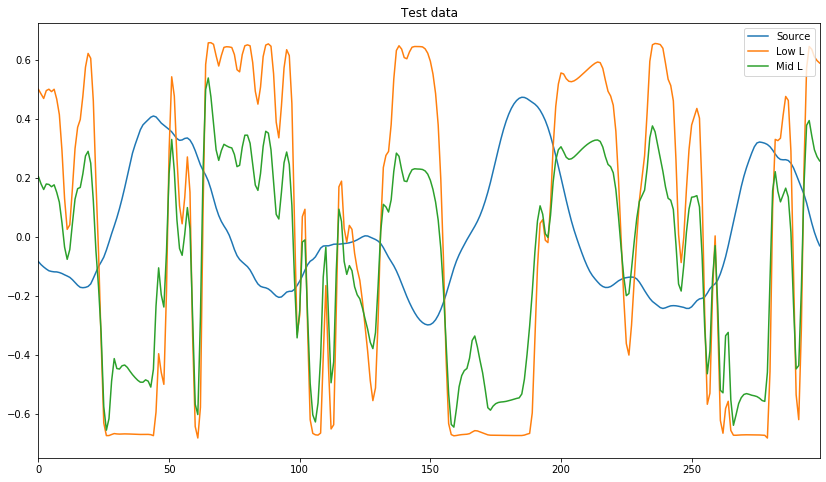

In [97]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_lm_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_te_hl_hm_f[start:n]).plot.line(ax=ax, label='Low L')
pd.Series(y_te_ll_lm_f[start:n]).plot.line(ax=ax, label='Mid L')
ax.legend(loc='upper right')
ax.set_title('Test data')

Text(0.5, 1.0, 'Test data')

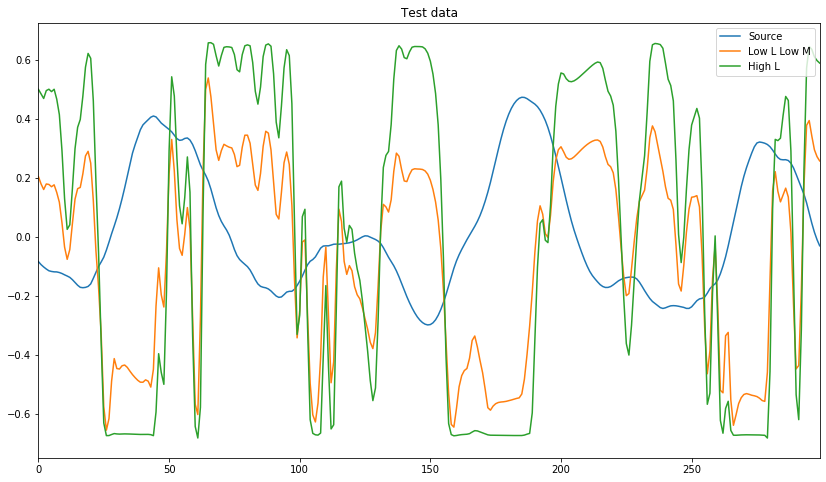

In [98]:
%matplotlib inline

(fig, ax) = plt.subplots(figsize=(14, 8))

start = 6500
n = start + 300

pd.Series(map(lambda x: x[-1][0], X_tr_ll_f[start:n])).plot.line(ax=ax, label='Source')
pd.Series(y_te_ll_lm_f[start:n]).plot.line(ax=ax, label='Low L Low M')
pd.Series(y_te_hl_hm_f[start:n]).plot.line(ax=ax, label='High L')
ax.legend(loc='upper right')
ax.set_title('Test data')

In [99]:
len(X_tr_ll_f), len(X_tr_ml_f), len(X_tr_hl_f), len(X_tr_lm_f), len(X_tr_mm_f), len(X_tr_hm_f)

(165935, 165935, 165935, 165935, 165935, 165935)

In [100]:
len(y_tr_ll_f), len(y_tr_ml_f), len(y_tr_hl_f), len(y_tr_lm_f), len(y_tr_mm_f), len(y_tr_hm_f)

(165935, 165935, 165935, 165935, 165935, 165935)

In [101]:
X_tr_s = np.concatenate([X_tr_ll_f, X_tr_ml_f, X_tr_hl_f, X_tr_lm_f, X_tr_mm_f, X_tr_hm_f])
y_tr_s = np.concatenate([y_tr_ll_f, y_tr_ml_f, y_tr_hl_f, y_tr_lm_f, y_tr_mm_f, y_tr_hm_f])
     
len(X_tr_s), len(y_tr_s), np.min(X_tr_s), np.min(y_tr_s)

(995610, 995610, -0.47080904, -0.74059266)

In [102]:
X_te_s = np.concatenate([X_te_ll_lm_f, X_te_hl_hm_f])
y_te_s = np.concatenate([y_te_ll_lm_f, y_te_hl_hm_f])
     
len(X_te_s), len(y_te_s), np.min(X_te_s), np.min(y_te_s)

(331870, 331870, -0.47080904, -0.7374798)

In [103]:
def add_stats(row):
    stats = [
        np.abs(row[-1]),
        -np.abs(row[-1]),
#         np.mean(row),
#         np.max(row),
#         np.min(row),
#         np.var(row)
    ]

    return np.array([(list(x) + list(stats)) for x in row])

In [104]:
X_tr_s[0][0]

array([3.051851e-05, 0.000000e+00, 5.000000e+00], dtype=float32)

## Finished data processing!

## Moving on to training NN

In [30]:
import numpy as np

In [31]:
# num_steps=100, 24 hidden states

In [32]:
import keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Reshape, GRU, CuDNNGRU, GaussianNoise
from keras.layers import Convolution2D, MaxPooling2D, Layer, Input, BatchNormalization
from keras.utils import np_utils
from keras.regularizers import L1L2
from keras.layers.merge import concatenate

tf.set_random_seed(1234)

Using TensorFlow backend.


In [33]:
X_tr_s.shape, y_tr_s.shape, X_te_s.shape, y_te_s.shape

((995610, 64, 3), (995610,), (331870, 64, 3), (331870,))

In [34]:
y_tr_s

array([ 0.000000e+00,  3.051851e-05,  3.051851e-05, ..., -7.122410e-01,
       -7.124241e-01, -7.104709e-01], dtype=float32)

In [35]:
import math

def predict(model, X_input, batch_size=1, verbose=0):
    # X_input = np.array(rows).reshape(rows.shape[0], rows.shape[1], n_features)
    
    return np.array(
        model.predict(
#             X_input[:(math.floor(len(X_input) / batch_size) * batch_size)],
            X_input,
            batch_size=batch_size,
            verbose=verbose,
        )
    ).flatten()

In [36]:
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt


# TensorBoard callback
# tensorboard_cb = keras.callbacks.TensorBoard(
#     log_dir='./logs',
#     batch_size=BATCH_SIZE,
#     # histogram_freq='batch',
#     write_graph=True,
#     write_grads=True,
#     write_images=True
# )

class PreviewLearning(keras.callbacks.Callback):
    def __init__(self, model, n_start=200, n_end=400, batch_size=1):
        self.model = model
        self.n_start = n_start
        self.n_end = n_end
        self.batch_size = batch_size
        
    def on_train_begin(self, epoch_n):
        (fig, ax) = plt.subplots(figsize=(12, 8))
        n_start = self.n_start
        n_end = self.n_end
#         (fig, ax) = plt.subplots()
        self.fig = fig
        self.ax = ax
        
        feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_tr_s[n_start:n_end])))))

        feat_data, =  ax.plot(feat.values, label='feature')

        targ = (pd.Series((y_tr_s[n_start:n_end])))

        pred = pd.Series(np.zeros(n_end - n_start))
        # pred = (pred * 2.2) + 0.001
        pred = pred + 0.001

        zeros = pd.Series(np.zeros(n_end - n_start))
        zeros.plot.line(ax=ax, label='0')

        targ_data, = ax.plot(targ.values, label='target')

        pred_data, = ax.plot(pred.values, label='predicted')
        # pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')
        
        self.feat_data = feat_data
        self.targ_data = targ_data
        self.pred_data = pred_data
        
        ax.legend(loc='upper right')
        ax.set_title('NN predictions on first {} samples'.format(n_end-n_start))
        ax.set_xlabel('index')
        ax.set_ylabel('value')
        
        plt.show()
        fig.canvas.draw()
        
        
    def on_epoch_end(self, epoch_n, logs={}):
        loss = logs['loss']
        model = self.model
        
        fig = self.fig
        ax = self.ax
        
        n_start = self.n_start
        n_end = self.n_end
        batch_size = self.batch_size

        feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_tr_s[n_start:n_end])))))

        self.feat_data.set_ydata(feat.values)

        targ = (pd.Series((y_tr_s[n_start:n_end])))

        pred = pd.Series(predict(model, X_tr_s[n_start:n_end], batch_size=batch_size))
        pred = pred + 0.001
        
        print(targ.shape[0], pred.shape[0])

        self.targ_data.set_ydata(targ.values)
        self.pred_data.set_ydata(pred.values)
        
        ax.set_title('NN predictions on first {} samples, epoch {}, loss={:.4f}'.format(n_end-n_start, epoch_n, loss))
        
        fig.canvas.draw()


# Callback to display the target and prediciton
# test_model_cb = keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

In [38]:
from keras import backend as K
    
def load_model(filepath):
    model = keras.models.load_model(filepath)
    
    return model
    
    
    
def create_model(params):
    input_L = Input(
        shape=(N_WINDOW_POINTS, n_features),
        batch_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
    )

    # bn_L = (BatchNormalization()(input_L))

    GRU_L = CuDNNGRU
    
    gru_1_L = GRU_L(
        params['n_units'],
        input_shape=(N_WINDOW_POINTS, n_features),
        batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         bias_regularizer=L1L2(l1=0.01, l2=0.01),
#         recurrent_regularizer=L1L2(l1=0.01, l2=0.01),
        stateful=True,
        # reset_after=True,
        # batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         activation='tanh',
#         recurrent_activation='hard_sigmoid',
        # kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
        kernel_initializer=keras.initializers.glorot_uniform(seed=43),
#         recurrent_initializer=keras.initializers.Orthogonal(gain=1.0, seed=42),
        recurrent_initializer=keras.initializers.glorot_uniform(seed=43),
        # kernel_initializer='identity',
        bias_initializer='zeros',
        return_sequences=True,
    )(input_L)

    gru_2_L = GRU_L(
        params['n_units'],
        input_shape=(N_WINDOW_POINTS, n_features),
        batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         bias_regularizer=L1L2(l1=0.01, l2=0.01),
#         recurrent_regularizer=L1L2(l1=0.01, l2=0.01),
        stateful=True,
        # reset_after=True,
        # batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         activation='tanh',
#         recurrent_activation='hard_sigmoid',
        # kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
        kernel_initializer=keras.initializers.glorot_uniform(seed=43),
#         recurrent_initializer=keras.initializers.Orthogonal(gain=1.0, seed=42),
        recurrent_initializer=keras.initializers.glorot_uniform(seed=43),
        # kernel_initializer='identity',
        bias_initializer='zeros',
    #     return_sequences=True,
    )(gru_1_L)

    dense_2_l = Dense(
        1,
        activation=None,
        kernel_initializer='identity',
        bias_initializer='zeros',
    # )(gru_1_l)
    )(gru_2_L)


    model = Model(inputs=input_L, outputs=dense_2_l)
    
    return model

    

def train_model(model, X_tr, y_tr, x_val, y_val, params, verbose_fit=0, preview_n_start=1000, preview_n_end=2000):
    print(params)
    
    optimizer = keras.optimizers.adam(lr=params['lr'], clipvalue=10, clipnorm=10)
    # optimizer = keras.optimizers.SGD(lr=params['lr'], decay=0.2)


    # model.compile(optimizer=optimizer, loss='mse')
    model.compile(optimizer=optimizer, loss='mae')
    
    # TRAIN

    es_cb = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0005,
        patience=8,
        verbose=0,
        mode='auto',
    )

    def step_decay(epoch):
        initial_lrate = params['lr']
        drop = 0.8
        epochs_drop = 40.0
        lrate = initial_lrate * math.pow(drop,  
               math.floor((1+epoch)/epochs_drop))
        return lrate

    lrate = keras.callbacks.LearningRateScheduler(step_decay)

    preview_learning = PreviewLearning(
        model,
        n_start=preview_n_start,
        n_end=preview_n_end,
        batch_size=params['batch_size']
    )

    history = model.fit(
        X_tr_s[:params['n_samples']],
        y_tr_s[:params['n_samples']],
        batch_size=params['batch_size'],
        shuffle=False,
        epochs=params['epochs'],
        verbose=verbose_fit,
        callbacks=[es_cb, preview_learning, lrate],
#         callbacks=[es_cb, preview_learning],
    )
    
    return (history, model)


def create_and_train_model(X_tr, y_tr, x_val, y_val, params):
    model = create_model(params)

    (history, model) = train_model(
        model,
        X_tr_s,
        y_tr_s,
        X_te_s,
        y_te_s,
#         X_tr_s[:params['n_samples']],
#         y_tr_s[:params['n_samples']],
#         X_te_s[:params['n_samples']],
#         y_te_s[:params['n_samples']],
        params
    )
    
    return (history, model)

In [47]:
%matplotlib notebook

from keras.optimizers import Adam, Nadam, RMSprop
import talos as ta

p = {
     'lr': [0.001, 0.002, 0.004],
     'n_samples': [4700],
     'n_units': [16, 20, 24],
#      'batch_size': [10, 100, 1000],
     'batch_size': [100],
     'epochs': [100],
     # 'dropout': (0, 0.5, 5),
     # 'weight_regulizer':[None],
     # 'emb_output_dims': [None],
     # 'shape':['brick','long_funnel'],
     'optimizer': [Adam],
 }

# 'lr': 0.004,
# 'n_samples': 44000 * 3,
# 'n_units': 20,
# 'batch_size': 500,
# 'epochs': 100,
# 'optimizer': keras.optimizers.Adam,
        
# and run the experiment
t = ta.Scan(x=X_tr_s[:np.max(p['n_samples'])],
            y=y_tr_s[:np.max(p['n_samples'])],
            model=create_and_train_model,
#             grid_downsample=0.5,
            params=p,
            experiment_name='test')

globals().update(locals())

ModuleNotFoundError: No module named 'talos'

In [ ]:
r = ta.Reporting(t)
r.data.sort_values(by='loss')


In [ ]:
best_params = r.data.loc[7]
best_params

In [ ]:
type(best_params)

{'lr': 0.001, 'n_samples': 331000, 'n_units': 20, 'batch_size': 1000, 'epochs': 100, 'optimizer': <class 'keras.optimizers.Adam'>}


<IPython.core.display.Javascript object>


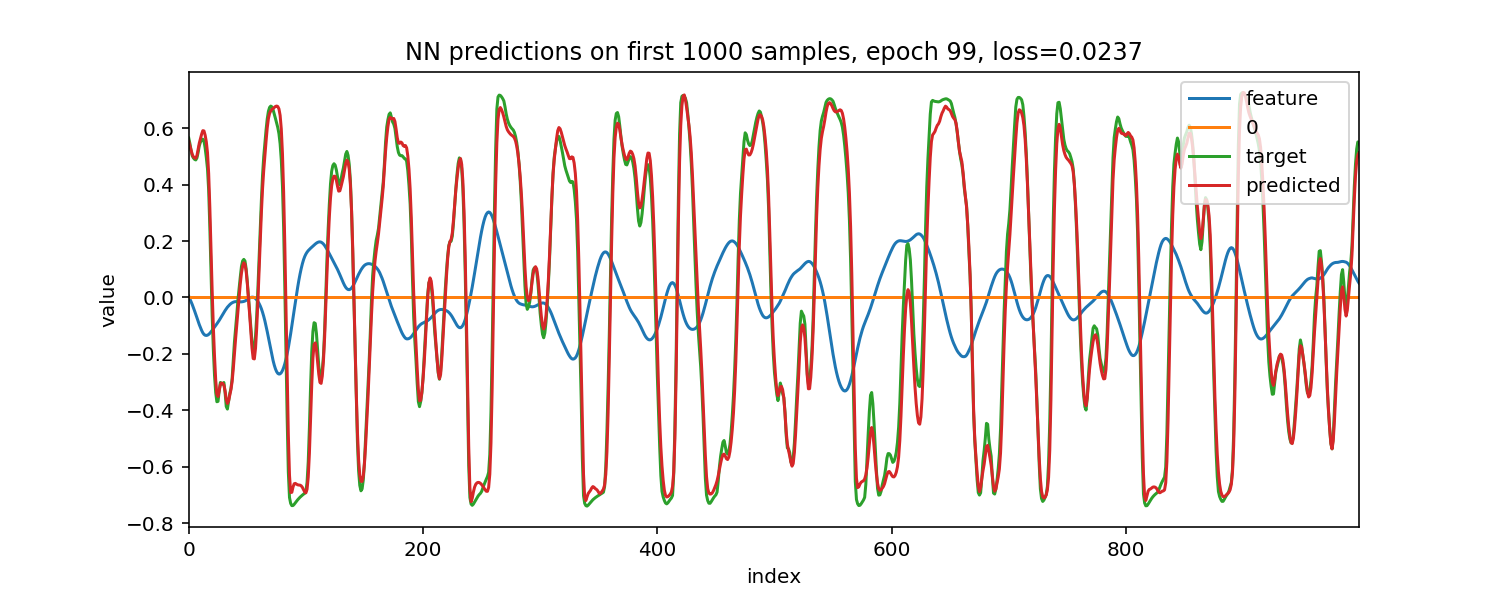

Epoch 1/100
331000/331000 [==============================] - 5s 16us/step - loss: 0.2324
1000 1000


/home/naissur/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.1166
1000 1000
Epoch 3/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.1032
1000 1000
Epoch 4/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0921
1000 1000
Epoch 5/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0824
1000 1000
Epoch 6/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0767
1000 1000
Epoch 7/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0732
1000 1000
Epoch 8/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0683
1000 1000
Epoch 9/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0606
1000 1000
Epoch 10/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0528
1000 1000
Epoch 11/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0504
1000 1000
Epoch 12

331000/331000 [==============================] - 4s 14us/step - loss: 0.0251
1000 1000
Epoch 85/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0250
1000 1000
Epoch 86/100
331000/331000 [==============================] - 4s 14us/step - loss: 0.0249
1000 1000
Epoch 87/100
331000/331000 [==============================] - 4s 14us/step - loss: 0.0248
1000 1000
Epoch 88/100
331000/331000 [==============================] - 4s 14us/step - loss: 0.0247
1000 1000
Epoch 89/100
331000/331000 [==============================] - 4s 14us/step - loss: 0.0246
1000 1000
Epoch 90/100
331000/331000 [==============================] - 4s 14us/step - loss: 0.0245
1000 1000
Epoch 91/100
331000/331000 [==============================] - 4s 14us/step - loss: 0.0244
1000 1000
Epoch 92/100
331000/331000 [==============================] - 5s 14us/step - loss: 0.0244
1000 1000
Epoch 93/100
331000/331000 [==============================] - 4s 13us/step - loss: 0.0243
1000 1000
Epoch 94/100


In [41]:
%%time
%matplotlib notebook

best_params = {
#     'lr': 0.0005,
    'lr': 0.001,
#     'n_samples': 18800,
#     'n_samples': 263000,
    'n_samples': 331000,
#     'n_units': 20,
    'n_units': 20,
    'batch_size': 1000,
    'epochs': 100,
    'optimizer': keras.optimizers.Adam,
}


# model = load_model('saved_models/02_peak_comp_60_samples_180_params.h5')
model = create_model(best_params)

history, model = train_model(
    model,
    X_tr_s[:best_params['n_samples']],
    y_tr_s[:best_params['n_samples']],
    X_te_s[:best_params['n_samples']],
    y_te_s[:best_params['n_samples']],
    best_params,
    verbose_fit=1,
    preview_n_start=14000,
    preview_n_end=15000,
)

globals().update(locals())

In [70]:
MAGIC_OFFSET = 1000

In [59]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)
    print('='*20)

[]
[array([[ 4.06294912e-01, -1.20115682e-01, -3.91873717e-01,
         4.84624505e-01,  2.49759834e-02,  2.57988214e-01,
        -1.85380533e-01, -1.35701612e-01, -5.93135417e-01,
        -3.05313319e-01, -7.98564732e-01, -1.57886100e+00,
         4.66221273e-01, -1.28839403e-01,  1.51406586e-01,
         3.02521866e-02,  1.56125382e-01, -2.07481921e-01,
        -6.70497537e-01,  2.46202484e-01, -5.03488779e-01,
        -1.08627351e-02,  1.60905659e-01,  2.17216671e-01,
         3.22489664e-02,  5.70607543e-01, -9.25002813e-01,
        -1.71404377e-01,  1.55536726e-01, -3.72927308e-01,
         1.02840476e-01,  5.31705558e-01,  5.04472673e-01,
         3.18458766e-01,  4.11075473e-01, -2.86615789e-01,
         1.51306495e-01, -1.75078306e-02, -1.28312066e-01,
         1.56757370e-01,  3.09890807e-01, -1.15531860e-02,
         2.88720299e-02, -2.38316417e-01, -2.71093886e-04,
         4.35062349e-02,  1.03039134e+00, -2.12675016e-02,
         1.20610707e-01, -3.38007718e-01,  7.9538254

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (1000, 64, 3)             0         
_________________________________________________________________
cu_dnngru_5 (CuDNNGRU)       (1000, 64, 20)            1500      
_________________________________________________________________
cu_dnngru_6 (CuDNNGRU)       (1000, 20)                2520      
_________________________________________________________________
dense_3 (Dense)              (1000, 1)                 21        
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________


In [61]:
# model.save('saved_models/02_peak_comp_60_samples_180_params.h5')

In [63]:
score = model.evaluate(X_te_s[:N_TEST], y_te_s[:N_TEST], verbose=0, batch_size=best_params['batch_size'])
score

0.2881202533482069

In [64]:
0.1430590125421683
0.040487171824161824

0.040487171824161824

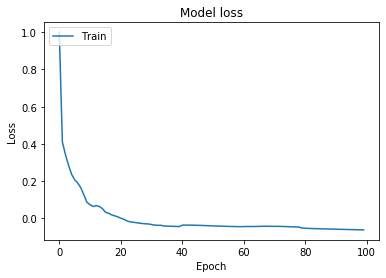

In [65]:
%matplotlib inline

from matplotlib import pyplot as plt

# Plot training & validation loss values
plt.plot(normalize(np.array(history.history['loss'])))
# plt.plot(normalize(np.array(history.history['val_loss'])))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [66]:
len(X_te_s)

331870

In [105]:
pred = predict(model, X_te_s[:44000], batch_size=best_params['batch_size'])
ipd.Audio(pred, rate=44000)

In [68]:
print(X_tr_s[0][-1])

[0. 0. 5.]


0    0.044083
1    0.053836
2    0.047493
3    0.046690
4    0.049602
dtype: float32


Text(0, 0.5, 'value')

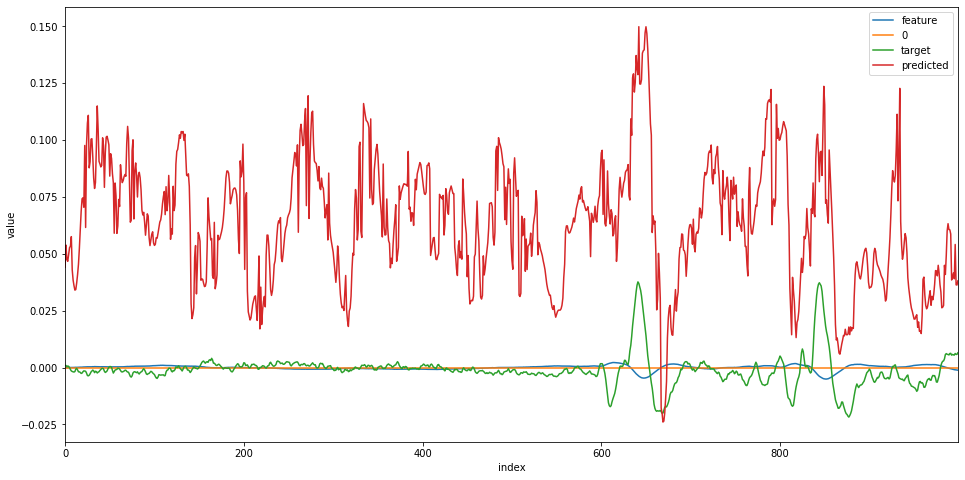

In [79]:
%matplotlib inline
from scipy.signal import savgol_filter

(fig, ax) = plt.subplots(figsize=(16, 8))

I = 1000
OFFSET = int(MAGIC_OFFSET) + N_TEST

X_to_test = X_te_s
y_to_test = y_te_s

feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_to_test[:(I + OFFSET)]))))[OFFSET:])

feat.plot.line(ax=ax, label='feature')

targ = pd.Series(y_to_test[OFFSET:(I + OFFSET)])

pred = pd.Series(predict(model, X_to_test[:(I + OFFSET)], batch_size=best_params['batch_size'])[OFFSET:])
# pred = (pred * 3.2) + 0.001
pred = pred + 0.001

zeros = pd.Series(np.zeros(I))
zeros.plot.line(ax=ax, label='0')

targ.plot.line(ax=ax, label='target')

print(pred[:5])

pred.plot.line(ax=ax, label='predicted')
# pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')

# pd.Series(normalize(np.array(list(map(lambda w: w[-1], X_te_f[:I]))))).plot.line(ax=ax, label='feature')

ax.legend(loc="upper right")
ax.set_xlabel('index')
ax.set_ylabel('value')


## Time to evaluate performance

In [114]:
# X_to_repeat = X_tr_s[:int(44000 * 2.8)]
# X_to_pred = np.concatenate([X_to_repeat, X_to_repeat, X_to_repeat])
# len(X_to_pred) / 44000, X_to_pred[0][:4], X_to_pred[1][:4]

In [61]:
def mapper(a):
    i = a[0]
    row = a[1]
    
    t = i / len(X_to_pred)
    gain = 1.0 * (1 - t) + 6.4 * t
    
    return np.array(list(map(lambda x: [x[0], gain], row)))

# X_to_pred = np.array(list(map(mapper, enumerate(X_to_pred))))

# X_to_pred[0][:5], X_to_pred[1][:5], X_to_pred[-2][:5], X_to_pred[-1][:5]

In [67]:
X_to_pred = X_tr_s[:(X_tr_s.shape[0] // best_params['batch_size']) * best_params['batch_size']]

In [68]:
predictions = predict(model, X_to_pred, batch_size=best_params['batch_size'], verbose=1)
len(predictions), predictions[:10], np.max(predictions), np.min(predictions)

263000/263000 [==============================] - 1s 3us/step


(263000,
 array([-0.05937488, -0.0590545 , -0.05882681, -0.05877836, -0.05880947,
        -0.05874747, -0.05854729, -0.05837908, -0.0582295 , -0.05822694],
       dtype=float32),
 1.0069656,
 -1.3094412)

In [69]:
np.min(y_te_s)

-0.74059266

In [70]:
predictions_n = np.clip((predictions / 1.2) * 0.8, -1.0, 1.0) * MAX_VALUE
len(predictions_n), predictions_n[:10], np.max(predictions_n), np.min(predictions_n)

(263000, array([-1297.0243, -1290.0258, -1285.052 , -1283.9937, -1284.6731,
        -1283.3188, -1278.9459, -1275.2715, -1272.004 , -1271.948 ],
       dtype=float32), 21996.826, -28604.305)

In [71]:
wavfile.write('output/pred_out_gr_jump_head_gain_2_params_v3.wav', source_fs, predictions)

In [128]:
len(predictions) / 44000

1.9772727272727273